# Task # 5 - To explore Business Analytics¶
Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’

You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

In [19]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#importing the dataset
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
# describing thr dataset
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#To find if there are any null values present
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data.duplicated().sum()

17

In [8]:
data.drop_duplicates(subset=None, keep='first', inplace=True)

In [9]:
# looking at the dataset
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


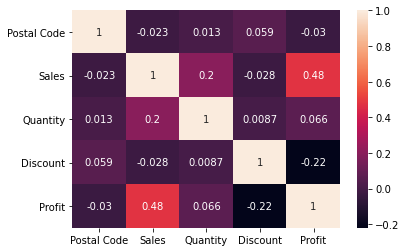

In [10]:
corr=data.corr()
sns.heatmap(corr, annot= True)

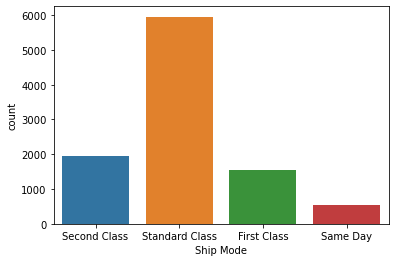

In [11]:
sns.countplot(x=data['Ship Mode'])

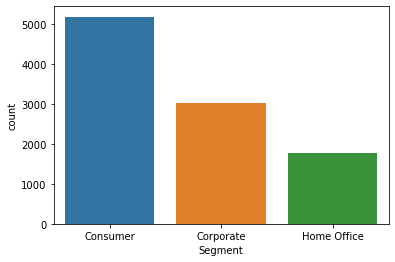

In [12]:
sns.countplot(x=data['Segment'])

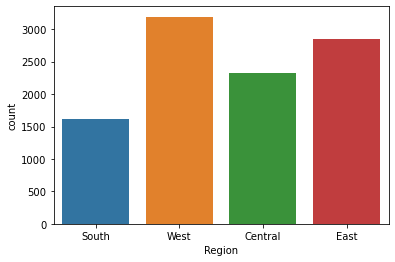

In [13]:
sns.countplot(x=data['Region'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

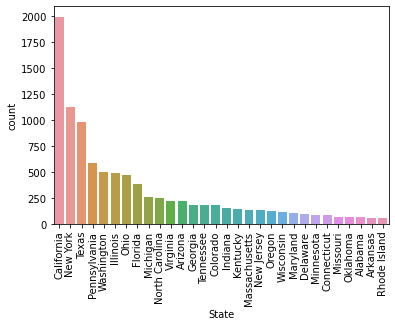

In [14]:
sns.countplot(x=data['State'],order=(data['State'].value_counts().head(30)).index)
plt.xticks(rotation=90)

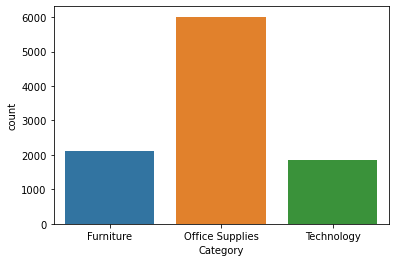

In [15]:
sns.countplot(x=data['Category'])

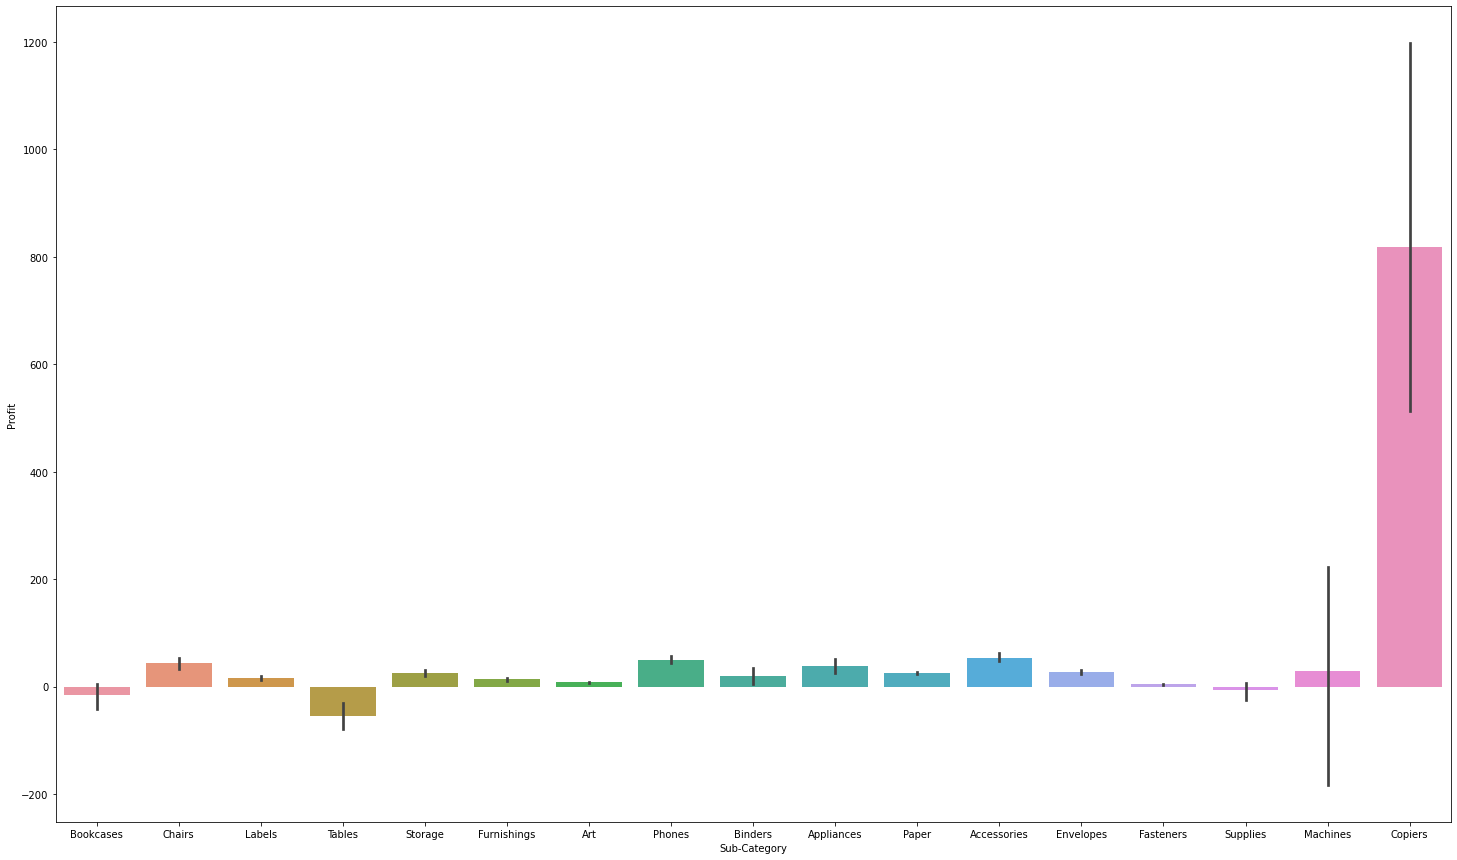

In [16]:
plt.figure(figsize=(25,15))
sns.barplot(x=data['Sub-Category'], y=data['Profit'])


From above graphs, the sales of bookcases and tables are not doing great. Company is facing losses with these two products. Company have a lot of profit in the sale of copier but the number of sales is very less so we need to increase the number of sales of copier.

<Figure size 2160x2160 with 0 Axes>

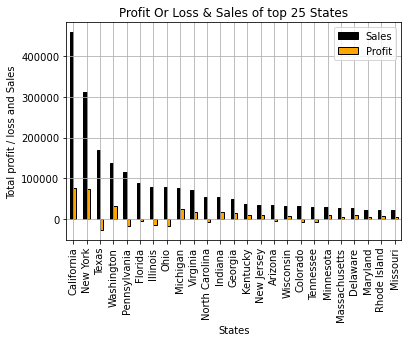

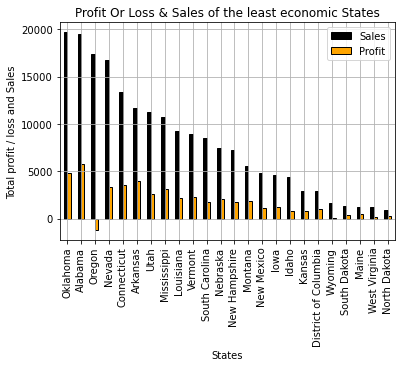

In [17]:
state = data.groupby("State")[["Sales","Profit"]].sum().sort_values(by = "Sales", ascending = False)
plt.figure(figsize = (30,30))
state[:25].plot(kind = "bar",color = ["k","orange"],edgecolor = "#000000")
plt.title("Profit Or Loss & Sales of top 25 States")
plt.xlabel("States")
plt.ylabel("Total profit / loss and Sales")
plt.grid(True)
state[25:].plot(kind = "bar",color = ["k","orange"],edgecolor = "#000000")
plt.title("Profit Or Loss & Sales of the least economic States")
plt.xlabel("States")
plt.ylabel("Total profit / loss and Sales")
plt.grid(True)

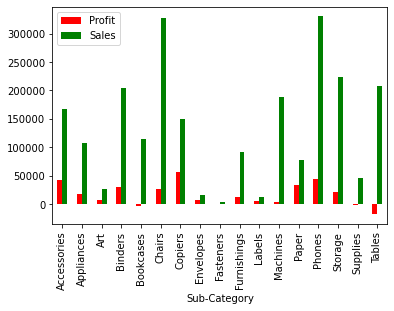

In [20]:
data.groupby('Sub-Category')['Profit','Sales'].sum().plot.bar(color = ['r','g'])

In [21]:
pd.DataFrame(data.groupby('State').sum())['Profit'].sort_values(ascending=True)

State
Texas                  -25750.9833
Ohio                   -16959.3178
Pennsylvania           -15565.4035
Illinois               -12601.6500
North Carolina          -7490.9122
Colorado                -6527.8579
Tennessee               -5341.6936
Arizona                 -3427.9246
Florida                 -3399.3017
Oregon                  -1194.0993
Wyoming                   100.1960
West Virginia             185.9216
North Dakota              230.1497
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1157.1161
Iowa                     1183.8119
New Hampshire            1706.5028
South Carolina           1769.0566
Montana                  1833.3285
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Utah                     2546.5335
Mississippi              3172.9762
Nevada        

In [22]:
pd.DataFrame(data.groupby('State').sum())['Discount'].sort_values(ascending=True)

State
Alabama                   0.00
Missouri                  0.00
Maine                     0.00
Louisiana                 0.00
Kentucky                  0.00
Kansas                    0.00
Iowa                      0.00
Indiana                   0.00
Wisconsin                 0.00
Mississippi               0.00
Nebraska                  0.00
North Dakota              0.00
District of Columbia      0.00
Oklahoma                  0.00
South Carolina            0.00
South Dakota              0.00
Vermont                   0.00
Arkansas                  0.00
Virginia                  0.00
Georgia                   0.00
Minnesota                 0.00
Wyoming                   0.20
West Virginia             0.30
New Hampshire             0.30
Maryland                  0.60
Connecticut               0.60
New Jersey                0.60
Delaware                  0.60
Montana                   1.00
Rhode Island              1.20
Idaho                     1.80
Michigan                  1.80
Ma

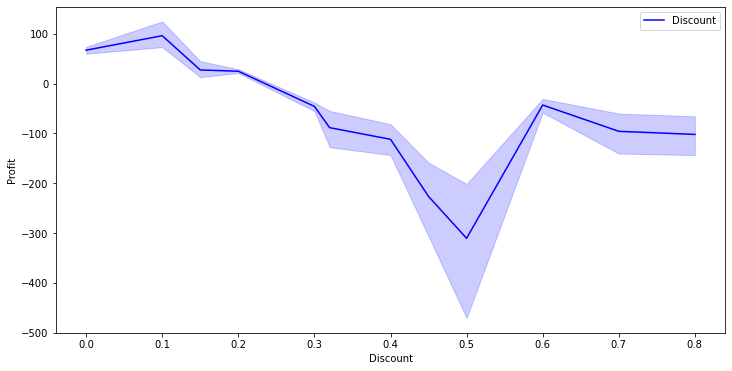

In [23]:
plt.figure(figsize = (12,6))
sns.lineplot('Discount', 'Profit', data = data, color = 'b', label= 'Discount')
plt.legend()

From the above study, when the profit of a state are compared with the discount provided in each state, the states which allowed more discount, went in loss and the above graph we conclude that, "THE PROFIT DECREASES WITH THE INCREASE IN DISCOUNT"

Insights derived from the above EDA:

1) Office Supplies are good. We have to work more on Technology and Furniture Category of business.

2) Company is facing losses in these two products that are sales of bookcases and tables which are negative in both cases

3) Company have a lots of profit in the sale of copier but the number of sales is very less so there is a need of increase in number of sales of copier.

4) The company facing loss in top 25 states is in compare to the least economic states.

5) When the profits of a state are compared with the discount provided in each state, the states which has allowed more discount, went into loss.

6) Profit and discount show very weak and negative relationship. This should be kept in mind that before taking any other decision related to business.